In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns

/home/justin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [48]:
# Load the Fashion MNIST dataset

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Create a validation set

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [3]:
# Create model using sequential API

model_2l = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [4]:
model_1l = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [5]:
model_6l = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(200, activation = "relu"),
    keras.layers.Dense(150, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(75, activation = "relu"),
    keras.layers.Dense(50, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [6]:
model_6l2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(150, activation = "relu"),
    keras.layers.Dense(150, activation = "relu"),
    keras.layers.Dense(150, activation = "relu"),
    keras.layers.Dense(150, activation = "relu"),
    keras.layers.Dense(150, activation = "relu"),
    keras.layers.Dense(150, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [14]:
# Compiling the model - i.e. specify loss function and optimizer

model_2l.compile(loss = "sparse_categorical_crossentropy",
             optimizer = keras.optimizers.SGD(lr = 0.01),
             metrics = ["accuracy"])

model_1l.compile(loss = "sparse_categorical_crossentropy",
             optimizer = keras.optimizers.SGD(lr = 0.01),
             metrics = ["accuracy"])

model_6l.compile(loss = "sparse_categorical_crossentropy",
             optimizer = keras.optimizers.SGD(lr = 0.01),
             metrics = ["accuracy"])

model_6l2.compile(loss = "sparse_categorical_crossentropy",
             optimizer = keras.optimizers.SGD(lr = 0.01),
             metrics = ["accuracy"])

In [8]:
# Training and evaluating the model

start_time = time.clock()

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

history_2l = model_2l.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

time_2l = time.clock() - start_time

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 56us/sample - loss: 0.7072 - accuracy: 0.7649 - val_loss: 0.4993 - val_accuracy: 0.8324
Epoch 2/100
55000/55000 [==============================] - 3s 50us/sample - loss: 0.4824 - accuracy: 0.8315 - val_loss: 0.4471 - val_accuracy: 0.8468
Epoch 3/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.4386 - accuracy: 0.8468 - val_loss: 0.4073 - val_accuracy: 0.8642
Epoch 4/100
55000/55000 [==============================] - 3s 47us/sample - loss: 0.4113 - accuracy: 0.8554 - val_loss: 0.3991 - val_accuracy: 0.8610
Epoch 5/100
55000/55000 [==============================] - 3s 47us/sample - loss: 0.3926 - accuracy: 0.8617 - val_loss: 0.4011 - val_accuracy: 0.8634
Epoch 6/100
55000/55000 [==============================] - 3s 47us/sample - loss: 0.3764 - accuracy: 0.8659 - val_loss: 0.3826 - val_accuracy: 0.8666
Epoch 7/100
55000/55000 [==========================

In [10]:
start_time = time.clock()

history_1l = model_1l.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

time_1l = time.clock() - start_time

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.7068 - accuracy: 0.7745 - val_loss: 0.5214 - val_accuracy: 0.8320
Epoch 2/100
55000/55000 [==============================] - 2s 44us/sample - loss: 0.5014 - accuracy: 0.8287 - val_loss: 0.4667 - val_accuracy: 0.8442
Epoch 3/100
55000/55000 [==============================] - 3s 46us/sample - loss: 0.4572 - accuracy: 0.8426 - val_loss: 0.4341 - val_accuracy: 0.8564
Epoch 4/100
55000/55000 [==============================] - 3s 47us/sample - loss: 0.4319 - accuracy: 0.8509 - val_loss: 0.4325 - val_accuracy: 0.8498
Epoch 5/100
55000/55000 [==============================] - 3s 47us/sample - loss: 0.4144 - accuracy: 0.8560 - val_loss: 0.4017 - val_accuracy: 0.8666
Epoch 6/100
55000/55000 [==============================] - 2s 45us/sample - loss: 0.3991 - accuracy: 0.8617 - val_loss: 0.3970 - val_accuracy: 0.8636
Epoch 7/100
55000/55000 [==========================

In [11]:
start_time = time.clock()

history_6l = model_6l.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

time_6l = time.clock() - start_time

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 58us/sample - loss: 0.8163 - accuracy: 0.7069 - val_loss: 0.5271 - val_accuracy: 0.8172
Epoch 2/100
55000/55000 [==============================] - 3s 52us/sample - loss: 0.4866 - accuracy: 0.8274 - val_loss: 0.4317 - val_accuracy: 0.8518
Epoch 3/100
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4204 - accuracy: 0.8481 - val_loss: 0.4045 - val_accuracy: 0.8540
Epoch 4/100
55000/55000 [==============================] - 3s 62us/sample - loss: 0.3810 - accuracy: 0.8631 - val_loss: 0.3557 - val_accuracy: 0.8740
Epoch 5/100
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3577 - accuracy: 0.8687 - val_loss: 0.3462 - val_accuracy: 0.8770
Epoch 6/100
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3372 - accuracy: 0.8773 - val_loss: 0.4041 - val_accuracy: 0.8550
Epoch 7/100
55000/55000 [==========================

In [15]:
start_time = time.clock()

history_6l2 = model_6l2.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

time_6l2 = time.clock() - start_time

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 4s 75us/sample - loss: 0.8356 - accuracy: 0.7025 - val_loss: 0.5967 - val_accuracy: 0.7888
Epoch 2/100
55000/55000 [==============================] - 3s 55us/sample - loss: 0.4998 - accuracy: 0.8228 - val_loss: 0.4369 - val_accuracy: 0.8468
Epoch 3/100
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4333 - accuracy: 0.8435 - val_loss: 0.3876 - val_accuracy: 0.8600
Epoch 4/100
55000/55000 [==============================] - 3s 61us/sample - loss: 0.3962 - accuracy: 0.8563 - val_loss: 0.3689 - val_accuracy: 0.8656
Epoch 5/100
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3686 - accuracy: 0.8653 - val_loss: 0.3952 - val_accuracy: 0.8624
Epoch 6/100
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3497 - accuracy: 0.8720 - val_loss: 0.3533 - val_accuracy: 0.8720
Epoch 7/100
55000/55000 [==========================

In [16]:
print(time_2l)
print(time_1l)
print(time_6l)
print(time_6l2)

113.115032
222.69702700000002
115.924667
155.02169899999996


In [17]:
model_2l.save("mlp_2l.h5")
model_1l.save("mlp_1l.h5")
model_6l.save("mlp_6l.h5")
model_6l2.save("mlp_6l2.h5")

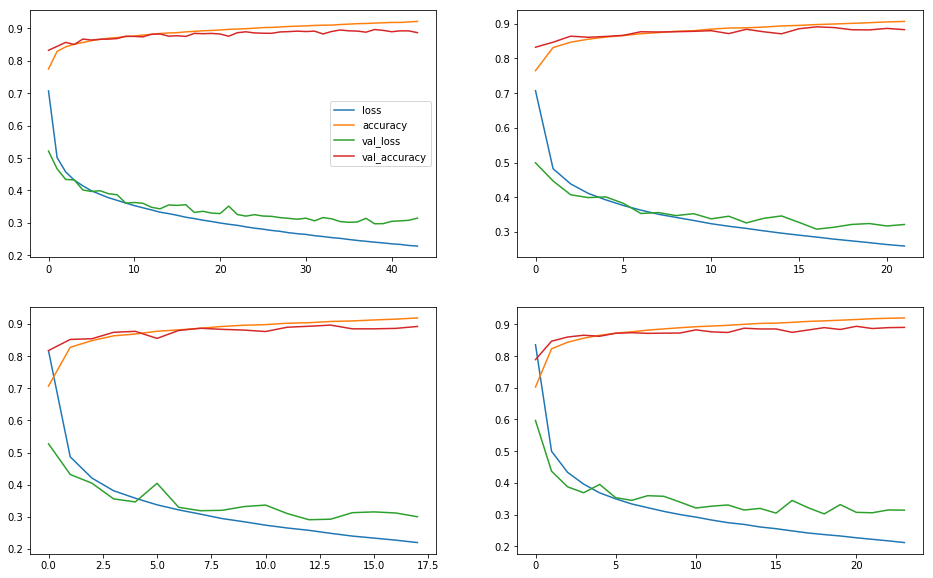

In [44]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (16, 10))

df1 = pd.DataFrame(history_1l.history)
df2 = pd.DataFrame(history_2l.history)
df3 = pd.DataFrame(history_6l.history)
df4 = pd.DataFrame(history_6l2.history)


df1.plot(ax = ax1)
df2.plot(ax = ax2, legend = False)
df3.plot(ax = ax3, legend = False)
df4.plot(ax = ax4, legend = False)

In [22]:
# Evaluate the model on the test set

model_2l.evaluate(X_test, y_test)
model_1l.evaluate(X_test, y_test)
model_6l.evaluate(X_test, y_test)
model_6l2.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 53.9496 - accuracy: 0.8201


[53.94958356018066, 0.8201]

Training model with one hidden layer and different learning rates:

In [55]:
lr = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]

In [56]:
model_1l_lr0 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

model_1l_lr1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

model_1l_lr2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

model_1l_lr3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

model_1l_lr4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

model_1l_lr5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [57]:
model_1l_lr0.compile(loss = "sparse_categorical_crossentropy",
             optimizer = keras.optimizers.SGD(lr = lr[0]),
             metrics = ["accuracy"])

model_1l_lr1.compile(loss = "sparse_categorical_crossentropy",
             optimizer = keras.optimizers.SGD(lr = lr[1]),
             metrics = ["accuracy"])

model_1l_lr2.compile(loss = "sparse_categorical_crossentropy",
             optimizer = keras.optimizers.SGD(lr = lr[2]),
             metrics = ["accuracy"])

model_1l_lr3.compile(loss = "sparse_categorical_crossentropy",
             optimizer = keras.optimizers.SGD(lr = lr[3]),
             metrics = ["accuracy"])

model_1l_lr4.compile(loss = "sparse_categorical_crossentropy",
             optimizer = keras.optimizers.SGD(lr = lr[4]),
             metrics = ["accuracy"])

model_1l_lr5.compile(loss = "sparse_categorical_crossentropy",
             optimizer = keras.optimizers.SGD(lr = lr[5]),
             metrics = ["accuracy"])

In [58]:
history_1l_lr0 = model_1l_lr0.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 48us/sample - loss: 2.3507 - accuracy: 0.1101 - val_loss: 2.3252 - val_accuracy: 0.1118
Epoch 2/100
55000/55000 [==============================] - 2s 45us/sample - loss: 2.2880 - accuracy: 0.1346 - val_loss: 2.2635 - val_accuracy: 0.1442
Epoch 3/100
55000/55000 [==============================] - 2s 45us/sample - loss: 2.2313 - accuracy: 0.1686 - val_loss: 2.2073 - val_accuracy: 0.1862
Epoch 4/100
55000/55000 [==============================] - 3s 46us/sample - loss: 2.1792 - accuracy: 0.2098 - val_loss: 2.1553 - val_accuracy: 0.2340
Epoch 5/100
55000/55000 [==============================] - 3s 48us/sample - loss: 2.1306 - accuracy: 0.2583 - val_loss: 2.1065 - val_accuracy: 0.2796
Epoch 6/100
55000/55000 [==============================] - 3s 46us/sample - loss: 2.0848 - accuracy: 0.3069 - val_loss: 2.0605 - val_accuracy: 0.3276
Epoch 7/100
55000/55000 [==========================

Epoch 55/100
55000/55000 [==============================] - 3s 51us/sample - loss: 1.1499 - accuracy: 0.6796 - val_loss: 1.1278 - val_accuracy: 0.6858
Epoch 56/100
55000/55000 [==============================] - 3s 52us/sample - loss: 1.1425 - accuracy: 0.6807 - val_loss: 1.1204 - val_accuracy: 0.6868
Epoch 57/100
55000/55000 [==============================] - 3s 50us/sample - loss: 1.1353 - accuracy: 0.6819 - val_loss: 1.1133 - val_accuracy: 0.6870
Epoch 58/100
55000/55000 [==============================] - 3s 50us/sample - loss: 1.1283 - accuracy: 0.6829 - val_loss: 1.1063 - val_accuracy: 0.6870
Epoch 59/100
55000/55000 [==============================] - 3s 51us/sample - loss: 1.1214 - accuracy: 0.6835 - val_loss: 1.0995 - val_accuracy: 0.6874
Epoch 60/100
55000/55000 [==============================] - 3s 50us/sample - loss: 1.1147 - accuracy: 0.6843 - val_loss: 1.0929 - val_accuracy: 0.6886
Epoch 61/100
55000/55000 [==============================] - 3s 50us/sample - loss: 1.1082 - ac

In [59]:
history_1l_lr1 = model_1l_lr1.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

history_1l_lr2 = model_1l_lr2.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

history_1l_lr3 = model_1l_lr3.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

history_1l_lr4 = model_1l_lr4.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

history_1l_lr5 = model_1l_lr5.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 54us/sample - loss: 2.1145 - accuracy: 0.2943 - val_loss: 1.8751 - val_accuracy: 0.4974
Epoch 2/100
55000/55000 [==============================] - 3s 48us/sample - loss: 1.7290 - accuracy: 0.5785 - val_loss: 1.5812 - val_accuracy: 0.6404
Epoch 3/100
55000/55000 [==============================] - 3s 49us/sample - loss: 1.4921 - accuracy: 0.6414 - val_loss: 1.3860 - val_accuracy: 0.6654
Epoch 4/100
55000/55000 [==============================] - 3s 49us/sample - loss: 1.3312 - accuracy: 0.6628 - val_loss: 1.2509 - val_accuracy: 0.6792
Epoch 5/100
55000/55000 [==============================] - 3s 50us/sample - loss: 1.2175 - accuracy: 0.6741 - val_loss: 1.1536 - val_accuracy: 0.6924
Epoch 6/100
55000/55000 [==============================] - 3s 53us/sample - loss: 1.1337 - accuracy: 0.6856 - val_loss: 1.0807 - val_accuracy: 0.7004
Epoch 7/100
55000/55000 [==========================

Epoch 55/100
55000/55000 [==============================] - 3s 47us/sample - loss: 0.5921 - accuracy: 0.8120 - val_loss: 0.5776 - val_accuracy: 0.8172
Epoch 56/100
55000/55000 [==============================] - 3s 47us/sample - loss: 0.5896 - accuracy: 0.8126 - val_loss: 0.5755 - val_accuracy: 0.8194
Epoch 57/100
55000/55000 [==============================] - 3s 51us/sample - loss: 0.5872 - accuracy: 0.8131 - val_loss: 0.5729 - val_accuracy: 0.8194
Epoch 58/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.5849 - accuracy: 0.8132 - val_loss: 0.5706 - val_accuracy: 0.8212
Epoch 59/100
55000/55000 [==============================] - 2s 45us/sample - loss: 0.5826 - accuracy: 0.8139 - val_loss: 0.5687 - val_accuracy: 0.8218
Epoch 60/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.5804 - accuracy: 0.8143 - val_loss: 0.5663 - val_accuracy: 0.8222
Epoch 61/100
55000/55000 [==============================] - 3s 46us/sample - loss: 0.5782 - ac

Epoch 9/100
55000/55000 [==============================] - 3s 48us/sample - loss: 0.5388 - accuracy: 0.8237 - val_loss: 0.5219 - val_accuracy: 0.8354
Epoch 10/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.5268 - accuracy: 0.8281 - val_loss: 0.5128 - val_accuracy: 0.8374
Epoch 11/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.5165 - accuracy: 0.8299 - val_loss: 0.5021 - val_accuracy: 0.8394
Epoch 12/100
55000/55000 [==============================] - 3s 50us/sample - loss: 0.5075 - accuracy: 0.8325 - val_loss: 0.4936 - val_accuracy: 0.8388
Epoch 13/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.4997 - accuracy: 0.8346 - val_loss: 0.4872 - val_accuracy: 0.8428
Epoch 14/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.4927 - accuracy: 0.8355 - val_loss: 0.4799 - val_accuracy: 0.8420
Epoch 15/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.4865 - acc

55000/55000 [==============================] - 3s 49us/sample - loss: 0.3176 - accuracy: 0.8892 - val_loss: 0.3452 - val_accuracy: 0.8794
Epoch 18/100
55000/55000 [==============================] - 3s 50us/sample - loss: 0.3129 - accuracy: 0.8905 - val_loss: 0.3326 - val_accuracy: 0.8816
Epoch 19/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3083 - accuracy: 0.8928 - val_loss: 0.3368 - val_accuracy: 0.8818
Epoch 20/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3039 - accuracy: 0.8935 - val_loss: 0.3279 - val_accuracy: 0.8864
Epoch 21/100
55000/55000 [==============================] - 3s 59us/sample - loss: 0.2996 - accuracy: 0.8956 - val_loss: 0.3348 - val_accuracy: 0.8858
Epoch 22/100
55000/55000 [==============================] - 3s 48us/sample - loss: 0.2952 - accuracy: 0.8971 - val_loss: 0.3301 - val_accuracy: 0.8846
Epoch 23/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.2909 - accuracy: 0.897

In [120]:
pd.DataFrame(history_1l_lr3.history)

,loss,accuracy,val_loss,val_accuracy
0,0.709103,0.774145,0.525971,0.8262
1,0.501572,0.831073,0.465556,0.8480
2,0.457516,0.842673,0.439399,0.8550
3,0.431216,0.851455,0.420350,0.8552
4,0.413743,0.857255,0.404835,0.8666
5,0.399212,0.862182,0.390071,0.8668
6,0.387545,0.866309,0.383010,0.8692
7,0.376851,0.869509,0.381197,0.8688
8,0.367532,0.871436,0.369847,0.8734
9,0.359169,0.875164,0.378303,0.8698


[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

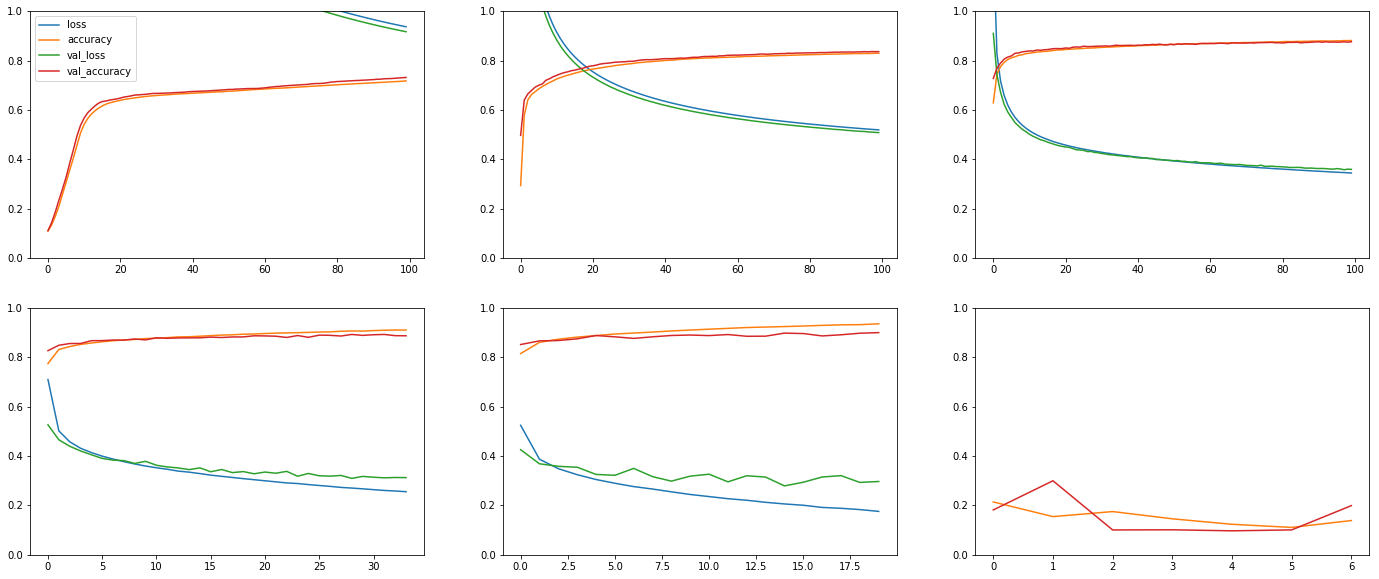

In [154]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (24, 10))

df1 = pd.DataFrame(history_1l_lr0.history)
df2 = pd.DataFrame(history_1l_lr1.history)
df3 = pd.DataFrame(history_1l_lr2.history)
df4 = pd.DataFrame(history_1l_lr3.history)
df5 = pd.DataFrame(history_1l_lr4.history)
df6 = pd.DataFrame(history_1l_lr5.history)


df1.plot(ax = ax1)
df2.plot(ax = ax2, legend = False)
df3.plot(ax = ax3, legend = False)
df4.plot(ax = ax4, legend = False)
df5.plot(ax = ax5, legend = False)
df6.plot(ax = ax6, legend = False)

custom_ylim = (0, 1)
plt.setp((ax1, ax2, ax3, ax4, ax5, ax6), ylim = custom_ylim)

In [75]:
accuracies = []

accuracies.append(model_1l_lr0.evaluate(X_test, y_test)[1])
accuracies.append(model_1l_lr1.evaluate(X_test, y_test)[1])
accuracies.append(model_1l_lr2.evaluate(X_test, y_test)[1])
accuracies.append(model_1l_lr3.evaluate(X_test, y_test)[1])
accuracies.append(model_1l_lr4.evaluate(X_test, y_test)[1])
accuracies.append(model_1l_lr5.evaluate(X_test, y_test)[1])


10000/10000 [==============================] - 0s 35us/sample - loss: 43.3184 - accuracy: 0.3048


Text(0.5,0,'Learning rate')

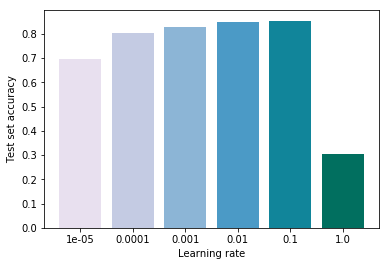

In [110]:
y_pos = np.arange(len(lr))

plt.bar(y_pos, accuracies, color = sns.color_palette("PuBuGn"))
plt.xticks(y_pos, lr)
plt.ylabel("Test set accuracy")
plt.xlabel("Learning rate")

Training model with two hidden layers and different optimizers:

In [131]:
opt = ["RMSprop", "Adam", "SGD"]

In [139]:
model_2l_opt0 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

model_2l_opt1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

model_2l_opt2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [140]:
model_2l_opt0.compile(loss = "sparse_categorical_crossentropy",
             optimizer = opt[0],
             metrics = ["accuracy"])

model_2l_opt1.compile(loss = "sparse_categorical_crossentropy",
             optimizer = opt[1],
             metrics = ["accuracy"])

model_2l_opt2.compile(loss = "sparse_categorical_crossentropy",
             optimizer = opt[2],
             metrics = ["accuracy"])

In [141]:
history_2l_opt0 = model_2l_opt0.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

history_2l_opt1 = model_2l_opt1.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

history_2l_opt2 = model_2l_opt2.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 61us/sample - loss: 0.5036 - accuracy: 0.8163 - val_loss: 0.4027 - val_accuracy: 0.8616
Epoch 2/100
55000/55000 [==============================] - 3s 56us/sample - loss: 0.3914 - accuracy: 0.8613 - val_loss: 0.3911 - val_accuracy: 0.8670
Epoch 3/100
55000/55000 [==============================] - 3s 59us/sample - loss: 0.3687 - accuracy: 0.8720 - val_loss: 0.4226 - val_accuracy: 0.8656
Epoch 4/100
55000/55000 [==============================] - 3s 57us/sample - loss: 0.3564 - accuracy: 0.8758 - val_loss: 0.3675 - val_accuracy: 0.8796
Epoch 5/100
55000/55000 [==============================] - 3s 59us/sample - loss: 0.3461 - accuracy: 0.8818 - val_loss: 0.4141 - val_accuracy: 0.8736
Epoch 6/100
55000/55000 [==============================] - 3s 56us/sample - loss: 0.3424 - accuracy: 0.8837 - val_loss: 0.3988 - val_accuracy: 0.8794
Epoch 7/100
55000/55000 [==========================

10000/10000 [==============================] - 0s 33us/sample - loss: 67.0661 - accuracy: 0.8407


Text(0.5,0,'Optimizer')

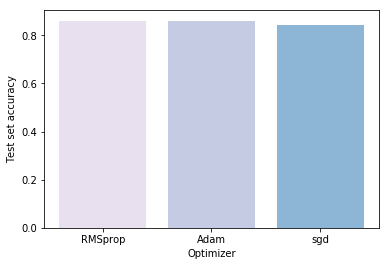

In [143]:
accuracies = []

accuracies.append(model_2l_opt0.evaluate(X_test, y_test)[1])
accuracies.append(model_2l_opt1.evaluate(X_test, y_test)[1])
accuracies.append(model_2l_opt2.evaluate(X_test, y_test)[1])

y_pos = np.arange(len(opt))

plt.bar(y_pos, accuracies, color = sns.color_palette("PuBuGn"))
plt.xticks(y_pos, opt)
plt.ylabel("Test set accuracy")
plt.xlabel("Optimizer")

[0, 1, 0, 1, 0, 1]

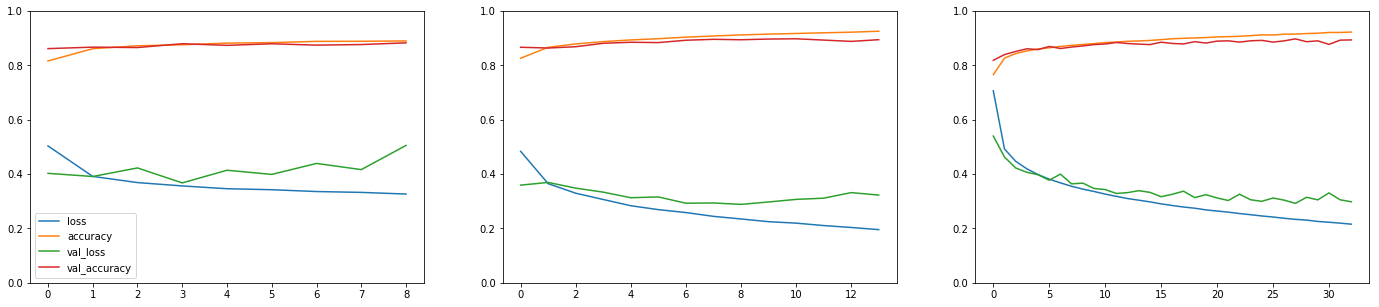

In [153]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 5))

df1 = pd.DataFrame(history_2l_opt0.history)
df2 = pd.DataFrame(history_2l_opt1.history)
df3 = pd.DataFrame(history_2l_opt2.history)

df1.plot(ax = ax1)
df2.plot(ax = ax2, legend = False)
df3.plot(ax = ax3, legend = False)

custom_ylim = (0, 1)
plt.setp((ax1, ax2, ax3), ylim = custom_ylim)

Training model with one and six hidden layers and different dropout methods:

In [145]:
model_6l_drop = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(200, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(150, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(75, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(50, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = "softmax")
])

model_1l_drop = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = "softmax")
])

model_6l_l2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(200, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(150, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(75, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(50, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation = "softmax")
])

model_1l_l2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(1000, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation = "softmax")
])

In [146]:
model_6l_drop.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "Adam",
             metrics = ["accuracy"])

model_1l_drop.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "Adam",
             metrics = ["accuracy"])

model_6l_l2.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "Adam",
             metrics = ["accuracy"])

model_1l_l2.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "Adam",
             metrics = ["accuracy"])

In [147]:
history_6l_drop = model_6l_drop.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

history_1l_drop = model_1l_drop.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

history_6l_l2 = model_6l_l2.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

history_1l_l2 = model_1l_l2.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 4s 80us/sample - loss: 1.6543 - accuracy: 0.3277 - val_loss: 1.1021 - val_accuracy: 0.5210
Epoch 2/100
55000/55000 [==============================] - 4s 74us/sample - loss: 1.1649 - accuracy: 0.4947 - val_loss: 0.9732 - val_accuracy: 0.5844
Epoch 3/100
55000/55000 [==============================] - 4s 78us/sample - loss: 1.0898 - accuracy: 0.5333 - val_loss: 0.9571 - val_accuracy: 0.5522
Epoch 4/100
55000/55000 [==============================] - 4s 75us/sample - loss: 1.0343 - accuracy: 0.5554 - val_loss: 0.8732 - val_accuracy: 0.5804
Epoch 5/100
55000/55000 [==============================] - 4s 69us/sample - loss: 0.9757 - accuracy: 0.5955 - val_loss: 0.8375 - val_accuracy: 0.6522
Epoch 6/100
55000/55000 [==============================] - 4s 70us/sample - loss: 0.9178 - accuracy: 0.6446 - val_loss: 0.7949 - val_accuracy: 0.6722
Epoch 7/100
55000/55000 [==========================

10000/10000 [==============================] - 0s 38us/sample - loss: 89.8517 - accuracy: 0.7294


Text(0.5,0,'Optimizer')

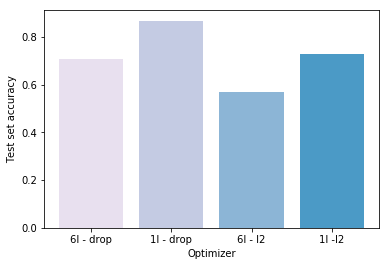

In [148]:
accuracies = []
drop = ["6l - drop", "1l - drop", "6l - l2", "1l -l2"]


accuracies.append(model_6l_drop.evaluate(X_test, y_test)[1])
accuracies.append(model_1l_drop.evaluate(X_test, y_test)[1])
accuracies.append(model_6l_l2.evaluate(X_test, y_test)[1])
accuracies.append(model_1l_l2.evaluate(X_test, y_test)[1])

y_pos = np.arange(len(drop))

plt.bar(y_pos, accuracies, color = sns.color_palette("PuBuGn"))
plt.xticks(y_pos, drop)
plt.ylabel("Test set accuracy")
plt.xlabel("Optimizer")

[0, 1, 0, 1, 0, 1, 0, 1]

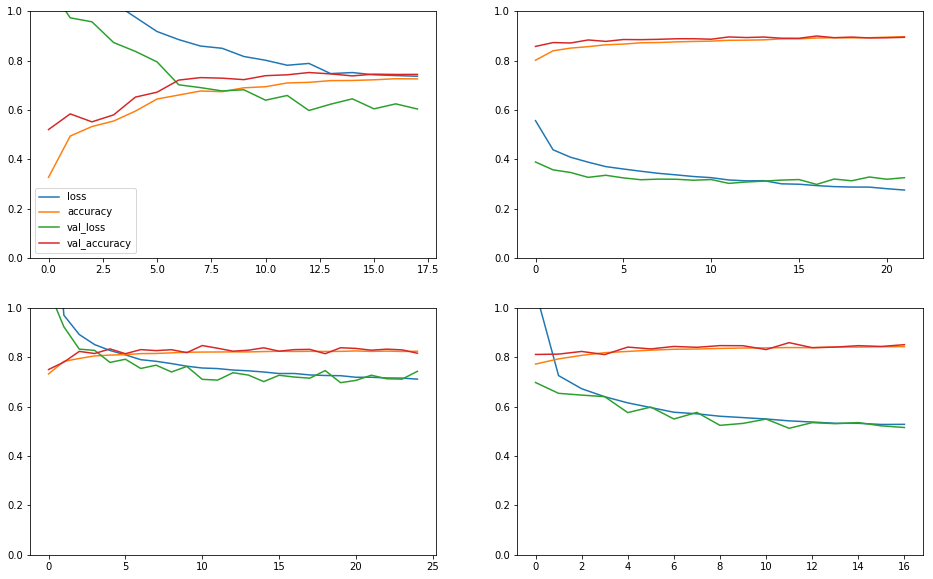

In [152]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (16, 10))

df1 = pd.DataFrame(history_6l_drop.history)
df2 = pd.DataFrame(history_1l_drop.history)
df3 = pd.DataFrame(history_6l_l2.history)
df4 = pd.DataFrame(history_1l_l2.history)

df1.plot(ax = ax1)
df2.plot(ax = ax2, legend = False)
df3.plot(ax = ax3, legend = False)
df4.plot(ax = ax4, legend = False)

custom_ylim = (0, 1)
plt.setp((ax1, ax2, ax3, ax4), ylim = custom_ylim)

Training model with 2 layers and different activation functions:

In [165]:
act = ["relu", "tanh", "sigmoid"]

model_2l_act0 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = act[0]),
    keras.layers.Dense(100, activation = act[0]),
    keras.layers.Dense(10, activation = "softmax")
])

model_2l_act1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = act[1]),
    keras.layers.Dense(100, activation = act[1]),
    keras.layers.Dense(10, activation = "softmax")
])

model_2l_act2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = act[2]),
    keras.layers.Dense(100, activation = act[2]),
    keras.layers.Dense(10, activation = "softmax")
])

In [166]:
model_2l_act0.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

model_2l_act1.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

model_2l_act2.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [167]:
history_2l_act0 = model_2l_act0.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

history_2l_act1 = model_2l_act1.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

history_2l_act2 = model_2l_act2.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])


Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 50us/sample - loss: 0.4851 - accuracy: 0.8256 - val_loss: 0.3972 - val_accuracy: 0.8608
Epoch 2/100
55000/55000 [==============================] - 3s 48us/sample - loss: 0.3645 - accuracy: 0.8667 - val_loss: 0.3484 - val_accuracy: 0.8738
Epoch 3/100
55000/55000 [==============================] - 3s 50us/sample - loss: 0.3295 - accuracy: 0.8782 - val_loss: 0.3534 - val_accuracy: 0.8774
Epoch 4/100
55000/55000 [==============================] - 3s 50us/sample - loss: 0.3044 - accuracy: 0.8874 - val_loss: 0.3236 - val_accuracy: 0.8844
Epoch 5/100
55000/55000 [==============================] - 3s 48us/sample - loss: 0.2838 - accuracy: 0.8939 - val_loss: 0.3196 - val_accuracy: 0.8880
Epoch 6/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.2710 - accuracy: 0.8991 - val_loss: 0.3047 - val_accuracy: 0.8902
Epoch 7/100
55000/55000 [==========================

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3690 - accuracy: 0.8733


Text(0.5,0,'Optimizer')

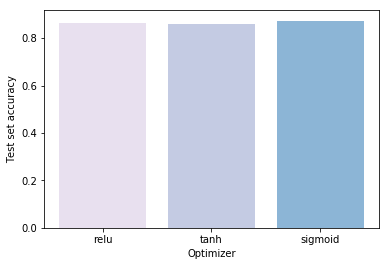

In [168]:
accuracies = []

accuracies.append(model_2l_act0.evaluate(X_test, y_test)[1])
accuracies.append(model_2l_act1.evaluate(X_test, y_test)[1])
accuracies.append(model_2l_act2.evaluate(X_test, y_test)[1])

y_pos = np.arange(len(act))

plt.bar(y_pos, accuracies, color = sns.color_palette("PuBuGn"))
plt.xticks(y_pos, act)
plt.ylabel("Test set accuracy")
plt.xlabel("Optimizer")

[0, 1, 0, 1, 0, 1]

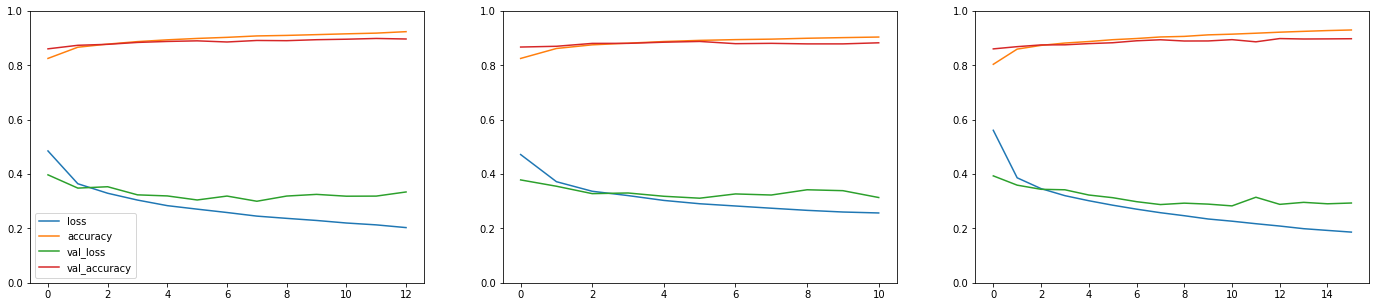

In [169]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 5))

df1 = pd.DataFrame(history_2l_act0.history)
df2 = pd.DataFrame(history_2l_act1.history)
df3 = pd.DataFrame(history_2l_act2.history)

df1.plot(ax = ax1)
df2.plot(ax = ax2, legend = False)
df3.plot(ax = ax3, legend = False)

custom_ylim = (0, 1)
plt.setp((ax1, ax2, ax3), ylim = custom_ylim)

In [172]:
act = ["relu", "tanh", "selu"]
wgt = ["he_normal", "glorot_normal", "lecun_normal"]

model_2l_wgt0 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = act[0], kernel_initializer = wgt[0]),
    keras.layers.Dense(100, activation = act[0], kernel_initializer = wgt[0]),
    keras.layers.Dense(10, activation = "softmax")
])

model_2l_wgt1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = act[1], kernel_initializer = wgt[1]),
    keras.layers.Dense(100, activation = act[1], kernel_initializer = wgt[1]),
    keras.layers.Dense(10, activation = "softmax")
])

model_2l_wgt2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = act[2], kernel_initializer = wgt[2]),
    keras.layers.Dense(100, activation = act[2], kernel_initializer = wgt[2]),
    keras.layers.Dense(10, activation = "softmax")
])

In [173]:
model_2l_wgt0.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

model_2l_wgt1.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

model_2l_wgt2.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [174]:
history_2l_wgt0 = model_2l_act0.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

history_2l_wgt1 = model_2l_act1.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

history_2l_wgt2 = model_2l_act2.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 50us/sample - loss: 0.2397 - accuracy: 0.9089 - val_loss: 0.3244 - val_accuracy: 0.8876
Epoch 2/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.2263 - accuracy: 0.9144 - val_loss: 0.3185 - val_accuracy: 0.8890
Epoch 3/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.2187 - accuracy: 0.9171 - val_loss: 0.3029 - val_accuracy: 0.8984
Epoch 4/100
55000/55000 [==============================] - 3s 48us/sample - loss: 0.2110 - accuracy: 0.9203 - val_loss: 0.3170 - val_accuracy: 0.8908
Epoch 5/100
55000/55000 [==============================] - 3s 50us/sample - loss: 0.2046 - accuracy: 0.9226 - val_loss: 0.3143 - val_accuracy: 0.8982
Epoch 6/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.1980 - accuracy: 0.9248 - val_loss: 0.3250 - val_accuracy: 0.8950
Epoch 7/100
55000/55000 [==========================

10000/10000 [==============================] - 0s 37us/sample - loss: 127.6893 - accuracy: 0.0288


Text(0.5,0,'Optimizer')

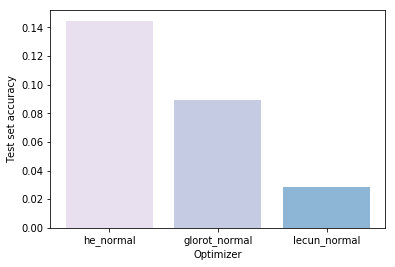

In [181]:
accuracies = []

accuracies.append(model_2l_wgt0.evaluate(X_test, y_test)[1])
accuracies.append(model_2l_wgt1.evaluate(X_test, y_test)[1])
accuracies.append(model_2l_wgt2.evaluate(X_test, y_test)[1])

y_pos = np.arange(len(wgt))

plt.bar(y_pos, accuracies, color = sns.color_palette("PuBuGn"))
plt.xticks(y_pos, wgt)
plt.ylabel("Test set accuracy")
plt.xlabel("Optimizer")

[0, 1, 0, 1, 0, 1]

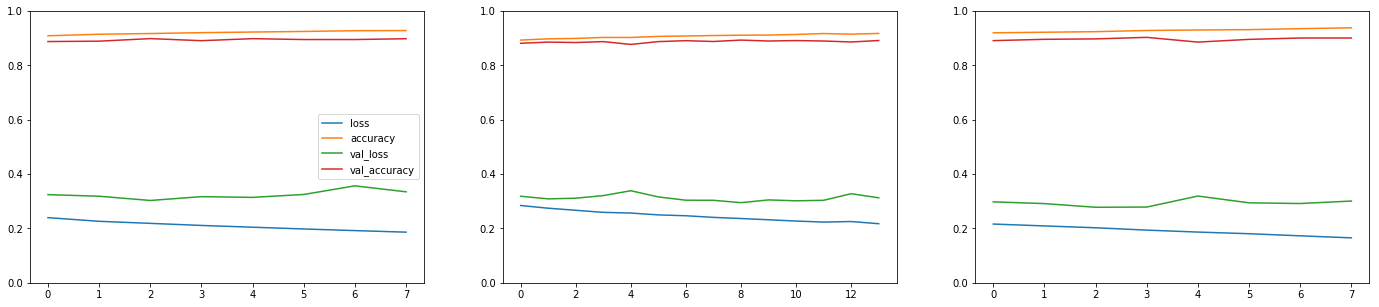

In [182]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 5))

df1 = pd.DataFrame(history_2l_wgt0.history)
df2 = pd.DataFrame(history_2l_wgt1.history)
df3 = pd.DataFrame(history_2l_wgt2.history)

df1.plot(ax = ax1)
df2.plot(ax = ax2, legend = False)
df3.plot(ax = ax3, legend = False)

custom_ylim = (0, 1)
plt.setp((ax1, ax2, ax3), ylim = custom_ylim)

In [217]:
final_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(256, activation = "sigmoid"),
    keras.layers.Dense(128, activation = "sigmoid"),
    keras.layers.Dense(10, activation = "softmax")
])  

final_model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [207]:
history_final = final_model.fit(X_train, y_train, 
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [early_stopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.5651 - accuracy: 0.8028 - val_loss: 0.3908 - val_accuracy: 0.8618
Epoch 2/100
55000/55000 [==============================] - 3s 46us/sample - loss: 0.3853 - accuracy: 0.8596 - val_loss: 0.3634 - val_accuracy: 0.8696
Epoch 3/100
55000/55000 [==============================] - 3s 46us/sample - loss: 0.3461 - accuracy: 0.8730 - val_loss: 0.3380 - val_accuracy: 0.8768
Epoch 4/100
55000/55000 [==============================] - 3s 47us/sample - loss: 0.3216 - accuracy: 0.8818 - val_loss: 0.3171 - val_accuracy: 0.8830
Epoch 5/100
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3026 - accuracy: 0.8873 - val_loss: 0.3226 - val_accuracy: 0.8860
Epoch 6/100
55000/55000 [==============================] - 3s 48us/sample - loss: 0.2844 - accuracy: 0.8949 - val_loss: 0.3219 - val_accuracy: 0.8840
Epoch 7/100
55000/55000 [==========================

10000/10000 [==============================] - 0s 34us/sample - loss: 0.4094 - accuracy: 0.8723


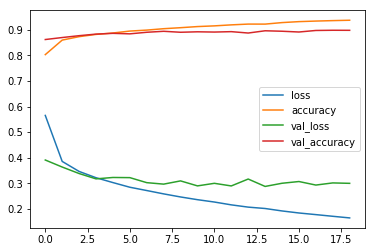

In [208]:
final_model.evaluate(X_test, y_test)

pd.DataFrame(history_final.history).plot()

### Task 2

In [309]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Create a validation set

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 

In [291]:
final_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [784]),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])  

final_model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

history_final = final_model.fit(tmp, y_train, 
                    epochs = 50)

Train on 55000 samples
Epoch 1/50
55000/55000 [==============================] - 3s 47us/sample - loss: 2.3172 - accuracy: 0.0994
Epoch 2/50
55000/55000 [==============================] - 2s 42us/sample - loss: 2.3015 - accuracy: 0.1101
Epoch 3/50
55000/55000 [==============================] - 2s 43us/sample - loss: 2.2958 - accuracy: 0.1183
Epoch 4/50
55000/55000 [==============================] - 2s 42us/sample - loss: 2.2903 - accuracy: 0.1285
Epoch 5/50
55000/55000 [==============================] - 2s 40us/sample - loss: 2.2845 - accuracy: 0.1373
Epoch 6/50
55000/55000 [==============================] - 2s 44us/sample - loss: 2.2777 - accuracy: 0.1443
Epoch 7/50
55000/55000 [==============================] - 2s 44us/sample - loss: 2.2705 - accuracy: 0.1547
Epoch 8/50
55000/55000 [==============================] - 2s 44us/sample - loss: 2.2621 - accuracy: 0.1639
Epoch 9/50
55000/55000 [==============================] - 3s 47us/sample - loss: 2.2529 - accuracy: 0.1716
Epoch 10/50
55